In [92]:
%pylab inline

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
import numpy as np
mpl.rcParams['pdf.fonttype'] = 42
import scipy.stats
import sklearn.linear_model
import sklearn.ensemble

DATAPATH = "../data"

# Zscores file: chrom	start	end	ml_mu	ml_mu_se	pred_mu	predmu_se	zscore
zscores = pd.read_csv(os.path.join(DATAPATH, "autosomal_perlocus_zscores.bed"), sep="\t")
loci = pd.read_csv(os.path.join(DATAPATH, "loci_for_figure.bed"), names=["chrom","start","end","marker"], sep="\t")
loci = pd.merge(loci, zscores, on=["chrom","start","end"])
loci["diff"] = loci["ml_mu"]-loci["pred_mu"]
loci["length"] = loci["end"]-loci["start"]+1

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [93]:
def GetColor(x):
    if x["marker"] == "CODIS": return "black"
    else: return "red"

def GetMarker(x):
    if x["marker"] == "CODIS": return "CODIS"
    else: return "DISEASE:%s"%x["marker"]
        
loci = loci.sort("marker")
loci["color"] = loci.apply(lambda x: GetColor(x), 1)
loci["marker"] = loci.apply(lambda x: GetMarker(x), 1)
loci = loci.sort("marker")

In [94]:
# Unscale standard errors, recalc zscores
"""
def GetZScore(x):
    num = x["ml_mu"]-x["pred_mu"]
    denom = np.sqrt(x["ml_mu_se_recalc"]**2/2 + x["predmu_se"]**2/2)
    return num/denom

GAMMA = 1.2
loci["ml_mu_se_recalc"] = loci.apply(lambda x: x["ml_mu_se"]/GAMMA/abs(x["ml_mu"]), 1)
loci["zscore"] = loci.apply(GetZScore, 1)
"""

'\ndef GetZScore(x):\n    num = x["ml_mu"]-x["pred_mu"]\n    denom = np.sqrt(x["ml_mu_se_recalc"]**2/2 + x["predmu_se"]**2/2)\n    return num/denom\n\nGAMMA = 1.2\nloci["ml_mu_se_recalc"] = loci.apply(lambda x: x["ml_mu_se"]/GAMMA/abs(x["ml_mu"]), 1)\nloci["zscore"] = loci.apply(GetZScore, 1)\n'

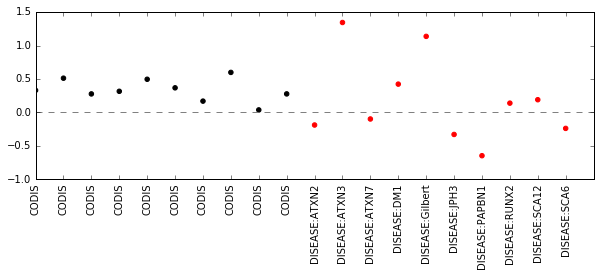

In [95]:
fig = plt.figure()
fig.set_size_inches((10, 3))
ax = fig.add_subplot(111)
ax.scatter(range(loci.shape[0]), loci["diff"], color=list(loci.color));
ax.set_xlim(left=0, right=loci.shape[0])
ax.set_xticks(range(loci.shape[0]))
ax.set_xticklabels(loci.marker, rotation=90);
ax.axhline(0, linestyle="dashed", color="gray")

In [96]:
loci

,chrom,start,end,marker,ml_mu,ml_mu_se,pred_mu,predmu_se,zscore,diff,length,color
3,5,123111250,123111293,CODIS,-3.029636,0.488550,-3.360218,0.020506,0.956099,0.330582,44,black
6,13,82722160,82722203,CODIS,-2.913486,0.283745,-3.425484,0.027197,2.540208,0.511998,44,black
1,3,45582231,45582294,CODIS,-2.772637,0.324022,-3.049722,0.091584,1.163763,0.277085,64,black
0,5,149455887,149455938,CODIS,-2.887243,0.744022,-3.203307,0.042736,0.599776,0.316064,52,black
8,18,60948900,60948971,CODIS,-2.474467,0.219746,-2.970391,0.061827,3.072315,0.495925,72,black
7,16,86386308,86386351,CODIS,-3.057584,0.598811,-3.425484,0.027197,0.867978,0.367901,44,black
9,19,30417141,30417192,CODIS,-2.996449,0.414179,-3.165914,0.033968,0.576702,0.169465,52,black
5,8,125907115,125907158,CODIS,-2.789651,0.576445,-3.387893,0.034200,1.465113,0.598242,44,black
4,7,83789542,83789593,CODIS,-3.077558,0.396328,-3.115553,0.034008,0.135082,0.037995,52,black
2,3,45582231,45582294,CODIS,-2.772513,0.326193,-3.049722,0.091584,1.157100,0.277209,64,black
